In [1]:
import numpy
import pandas as pd
import sklearn as scikit_learn

In [2]:
df_ludnosc = pd.read_csv("../data/ludnosc.csv", sep=";")
df_ludnosc.tail(10)

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
25864,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2011,"21,4",%,NaN,NaN
25865,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2012,"20,6",%,NaN,NaN
25866,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2013,"21,5",%,NaN,NaN
25867,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2014,"19,7",%,NaN,NaN
25868,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2015,"19,9",%,NaN,NaN
25869,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2016,"19,9",%,NaN,NaN
25870,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2017,"19,5",%,NaN,NaN
25871,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2018,"19,5",%,NaN,NaN
25872,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2019,"19,3",%,NaN,NaN
25873,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2020,"20,3",%,NaN,NaN


In [3]:
kategorie = ["towary i usługi konsumpcyjne", "żywność i napoje bezalkoholowe", "napoje alkoholowe i wyroby tytoniowe", "odzież i obuwie",
             "użytkowanie mieszkania lub domu i nośniki energii", "wyposażenie mieszkania i prowadzenie gospodarstwa domowego", "zdrowie",
             "transport", "łączność", "rekreacja i kultura", "edukacja", "restauracje i hotele", "pozostałe wydatki na towary i usługi"]

In [4]:
lata = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [5]:
nazwa = ['KUJAWSKO-POMORSKIE', 'LUBELSKIE', 'LUBUSKIE', 'ŁÓDZKIE', 'MAZOWIECKIE', 'ŚWIĘTOKRZYSKIE']

In [6]:
df_ludnosc['Rok'] = df_ludnosc['Rok'].apply(int)
df_ludnosc['Wartosc'] = df_ludnosc['Wartosc'].apply(str).str.replace(',','.').apply(float)

In [7]:
df = df_ludnosc[(df_ludnosc['Rok'].isin(lata)) & (df_ludnosc['Nazwa'].isin(nazwa)) & (df_ludnosc['Kategoria'] == 'Wydatki') & (df_ludnosc['Zmienna'].isin(kategorie))].drop(['Kod', 'Jednostka miary', 'Atrybut', 'Unnamed: 8', 'Kategoria'], axis=1)
df = df.reset_index(drop=True)
df

,Nazwa,Zmienna,Rok,Wartosc
0,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2003,592.55
1,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2004,596.37
2,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2005,578.22
3,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2006,646.69
4,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2007,707.06
...,...,...,...,...
1399,ŚWIĘTOKRZYSKIE,pozostałe wydatki na towary i usługi,2016,57.50
1400,ŚWIĘTOKRZYSKIE,pozostałe wydatki na towary i usługi,2017,72.24
1401,ŚWIĘTOKRZYSKIE,pozostałe wydatki na towary i usługi,2018,65.38
1402,ŚWIĘTOKRZYSKIE,pozostałe wydatki na towary i usługi,2019,64.08


In [8]:
df_p = pd.pivot_table(data=df, values='Wartosc', index=['Nazwa', 'Rok'], columns=['Zmienna']).reset_index()  
df_p['Suma'] = df_p[kategorie].sum(axis=1)
df_p

Zmienna,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe,Suma
0,KUJAWSKO-POMORSKIE,2003,7.47,18.82,30.31,30.89,35.51,10.62,592.55,60.09,131.68,28.45,26.38,28.19,178.59,1179.55
1,KUJAWSKO-POMORSKIE,2004,5.59,17.15,29.86,29.18,37.17,9.65,596.37,48.25,134.51,35.00,27.77,29.26,186.24,1186.00
2,KUJAWSKO-POMORSKIE,2005,5.14,18.40,29.61,26.17,40.29,7.63,578.22,48.64,123.81,30.57,26.34,32.31,185.09,1152.22
3,KUJAWSKO-POMORSKIE,2006,5.40,21.10,38.43,31.95,46.79,9.49,646.69,57.08,136.71,35.19,28.95,34.86,193.48,1286.12
4,KUJAWSKO-POMORSKIE,2007,7.96,22.76,38.99,35.18,56.67,11.10,707.06,64.72,145.66,41.13,30.63,37.52,204.74,1404.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,ŚWIĘTOKRZYSKIE,2016,5.02,18.89,57.80,57.50,62.12,32.21,930.20,72.60,195.53,53.00,60.88,46.91,266.04,1858.70
104,ŚWIĘTOKRZYSKIE,2017,7.25,19.97,60.68,72.24,55.85,37.42,998.54,83.91,200.30,58.40,68.84,49.15,282.86,1995.41
105,ŚWIĘTOKRZYSKIE,2018,7.45,23.01,58.92,65.38,55.51,46.28,1030.85,107.91,199.26,76.93,56.21,34.63,298.18,2060.52
106,ŚWIĘTOKRZYSKIE,2019,4.93,22.98,53.27,64.08,49.79,39.33,1015.24,92.76,197.27,65.25,69.44,46.10,308.59,2029.03


In [9]:
for kategoria in kategorie:
    df_p[kategoria] = round((df_p[kategoria] / df_p['Suma'])*100, 2)
df_p

Zmienna,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe,Suma
0,KUJAWSKO-POMORSKIE,2003,0.63,1.60,2.57,2.62,3.01,0.90,50.24,5.09,11.16,2.41,2.24,2.39,15.14,1179.55
1,KUJAWSKO-POMORSKIE,2004,0.47,1.45,2.52,2.46,3.13,0.81,50.28,4.07,11.34,2.95,2.34,2.47,15.70,1186.00
2,KUJAWSKO-POMORSKIE,2005,0.45,1.60,2.57,2.27,3.50,0.66,50.18,4.22,10.75,2.65,2.29,2.80,16.06,1152.22
3,KUJAWSKO-POMORSKIE,2006,0.42,1.64,2.99,2.48,3.64,0.74,50.28,4.44,10.63,2.74,2.25,2.71,15.04,1286.12
4,KUJAWSKO-POMORSKIE,2007,0.57,1.62,2.78,2.51,4.04,0.79,50.36,4.61,10.37,2.93,2.18,2.67,14.58,1404.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,ŚWIĘTOKRZYSKIE,2016,0.27,1.02,3.11,3.09,3.34,1.73,50.05,3.91,10.52,2.85,3.28,2.52,14.31,1858.70
104,ŚWIĘTOKRZYSKIE,2017,0.36,1.00,3.04,3.62,2.80,1.88,50.04,4.21,10.04,2.93,3.45,2.46,14.18,1995.41
105,ŚWIĘTOKRZYSKIE,2018,0.36,1.12,2.86,3.17,2.69,2.25,50.03,5.24,9.67,3.73,2.73,1.68,14.47,2060.52
106,ŚWIĘTOKRZYSKIE,2019,0.24,1.13,2.63,3.16,2.45,1.94,50.04,4.57,9.72,3.22,3.42,2.27,15.21,2029.03


In [10]:
di = {'DOLNOŚLĄSKIE' : 0, 'KUJAWSKO-POMORSKIE' : 1, 'LUBELSKIE' : 2, 'LUBUSKIE' : 3, 'ŁÓDZKIE' : 4, 'MAŁOPOLSKIE' : 5, 'MAZOWIECKIE' : 6, 'OPOLSKIE' : 7,
      'PODKARPACKIE' : 8, 'PODLASKIE' : 9, 'POMORSKIE' : 10, 'ŚLĄSKIE' : 11, 'ŚWIĘTOKRZYSKIE' : 12, 'WARMIŃSKO-MAZURSKIE' : 13, 'WIELKOPOLSKIE' : 14,
      'ZACHODNIOPOMORSKIE' : 15}
df_p = df_p.replace({'Nazwa': di})
df_p

Zmienna,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe,Suma
0,1,2003,0.63,1.60,2.57,2.62,3.01,0.90,50.24,5.09,11.16,2.41,2.24,2.39,15.14,1179.55
1,1,2004,0.47,1.45,2.52,2.46,3.13,0.81,50.28,4.07,11.34,2.95,2.34,2.47,15.70,1186.00
2,1,2005,0.45,1.60,2.57,2.27,3.50,0.66,50.18,4.22,10.75,2.65,2.29,2.80,16.06,1152.22
3,1,2006,0.42,1.64,2.99,2.48,3.64,0.74,50.28,4.44,10.63,2.74,2.25,2.71,15.04,1286.12
4,1,2007,0.57,1.62,2.78,2.51,4.04,0.79,50.36,4.61,10.37,2.93,2.18,2.67,14.58,1404.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,12,2016,0.27,1.02,3.11,3.09,3.34,1.73,50.05,3.91,10.52,2.85,3.28,2.52,14.31,1858.70
104,12,2017,0.36,1.00,3.04,3.62,2.80,1.88,50.04,4.21,10.04,2.93,3.45,2.46,14.18,1995.41
105,12,2018,0.36,1.12,2.86,3.17,2.69,2.25,50.03,5.24,9.67,3.73,2.73,1.68,14.47,2060.52
106,12,2019,0.24,1.13,2.63,3.16,2.45,1.94,50.04,4.57,9.72,3.22,3.42,2.27,15.21,2029.03


In [11]:
df_p.isna().sum()

Zmienna
Nazwa                                                         0
Rok                                                           0
edukacja                                                      0
napoje alkoholowe i wyroby tytoniowe                          0
odzież i obuwie                                               0
pozostałe wydatki na towary i usługi                          0
rekreacja i kultura                                           0
restauracje i hotele                                          0
towary i usługi konsumpcyjne                                  0
transport                                                     0
użytkowanie mieszkania lub domu i nośniki energii             0
wyposażenie mieszkania i prowadzenie gospodarstwa domowego    0
zdrowie                                                       0
łączność                                                      0
żywność i napoje bezalkoholowe                                0
Suma                            

In [12]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [13]:
# Kolumny od edukacji do żywność i napoje bezalkoholowe
X_to_pca = np.array(df_p.iloc[:,2:15])
X_to_pca

array([[ 0.63,  1.6 ,  2.57, ...,  2.24,  2.39, 15.14],
       [ 0.47,  1.45,  2.52, ...,  2.34,  2.47, 15.7 ],
       [ 0.45,  1.6 ,  2.57, ...,  2.29,  2.8 , 16.06],
       ...,
       [ 0.36,  1.12,  2.86, ...,  2.73,  1.68, 14.47],
       [ 0.24,  1.13,  2.63, ...,  3.42,  2.27, 15.21],
       [ 0.4 ,  1.28,  2.19, ...,  2.83,  2.55, 16.09]])

In [14]:
pipeline = make_pipeline(StandardScaler(), PCA())
X = pipeline.fit_transform(X_to_pca)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [16]:
X = pipeline.fit_transform(X_to_pca)
X

array([[-2.91792192e+00, -1.00394141e+00,  5.60122125e-01, ...,
         2.44774717e-01, -3.17685328e-01, -1.37554290e-03],
       [-3.40979723e+00,  5.69971165e-01,  5.24207253e-01, ...,
        -3.52064688e-01,  9.82522348e-02,  6.16757015e-03],
       [-3.96957656e+00, -4.03276559e-01,  1.69222969e-01, ...,
        -1.00984541e+00,  1.99391294e-01, -1.28038933e-03],
       ...,
       [ 1.71958428e+00,  3.43188544e+00,  7.76226890e-02, ...,
         1.63989892e-02, -2.17573999e-01,  1.88318393e-03],
       [ 8.63981145e-01,  4.11621094e+00, -4.04322695e-03, ...,
        -2.73190396e-01, -4.96887671e-01,  9.19715092e-04],
       [-8.70519970e-01,  3.01609383e+00,  9.46291008e-01, ...,
         2.01342136e-01,  3.46131484e-01,  2.55288541e-03]])

In [17]:
y = df_p['Nazwa']
y

0       1
1       1
2       1
3       1
4       1
       ..
103    12
104    12
105    12
106    12
107    12
Name: Nazwa, Length: 108, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [19]:
k_range = range(1,10)
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

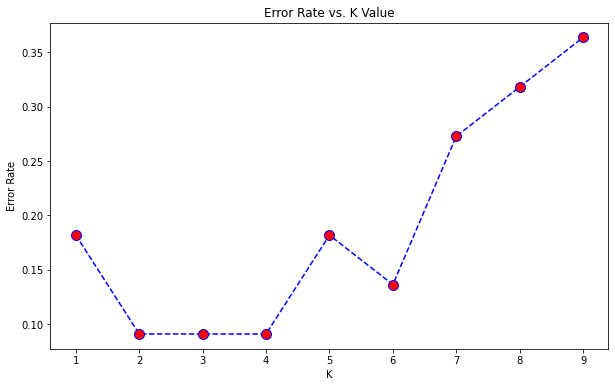

In [20]:
plt.figure(figsize=(10,6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {round(knn.score(X_test, y_test), 3)*100}%")

              precision    recall  f1-score   support

           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00         3
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.89      0.96      0.90        22
weighted avg       0.97      0.91      0.93        22

Accuracy: 90.9%


In [27]:
y_pred

array([ 1,  2,  2,  3, 12,  6,  6,  2,  1,  4,  6,  1, 12,  6, 12,  4,  1,
        3,  1,  1,  1,  3], dtype=int64)

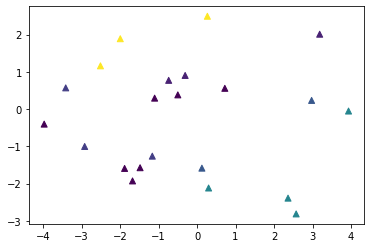

In [28]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker='^')
plt.show()